<a href="https://colab.research.google.com/github/cxbxmxcx/Evolutionary-Deep-Learning/blob/main/EDL_2_PyTorchBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title Defining Imports
#numpy
import numpy as np
#PyTorch
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
#plotting
from matplotlib import pyplot as plt

In [ ]:
#@title Setting Hyperparameters
learning_rate = 3.5e-03
epochs = 500
middle_layer = 5

# Creating Data

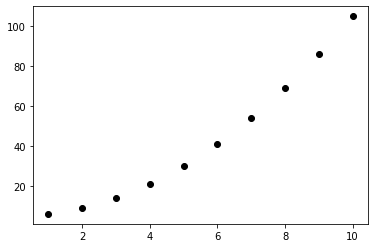

In [ ]:
#@title Creating data from function and reshaping
def function(X):
  return X * X + 5.

X = np.array([[1.],[2.],[3.],[4.],[5.],[6.],[7.],[8.],[9.],[10.]])
y = function(X)
inputs = X.shape[1]
y = y.reshape(-1, 1)
plt.plot(X, y, 'o', color='black')

# Building the Model

In [ ]:
#@title Define the Model
class Net(nn.Module):
  def __init__(self, inputs, middle):
    super().__init__()
    self.fc1 = nn.Linear(inputs,middle)
    self.fc2 = nn.Linear(middle,middle)
    self.out = nn.Linear(middle,1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [ ]:
#@title Create the model
model = Net(inputs, middle_layer)
print(model)

Net(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)


In [ ]:
#@title Define loss function (criterion) and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Streaming output truncated to the last 5000 lines.
[0/0] Loss = 31.701927185058594
[0/1] Loss = 74.93229675292969
[0/2] Loss = 187.11410522460938
[0/3] Loss = 428.4343566894531
[0/4] Loss = 883.0130615234375
[0/5] Loss = 1658.9017333984375
[0/6] Loss = 2888.0830078125
[0/7] Loss = 4726.47021484375
[0/8] Loss = 7353.9130859375
[0/9] Loss = 10974.1943359375
[1/0] Loss = 30.89093589782715
[1/1] Loss = 73.45780944824219
[1/2] Loss = 184.46697998046875
[1/3] Loss = 424.00946044921875
[1/4] Loss = 876.1427612304688
[1/5] Loss = 1648.8846435546875
[1/6] Loss = 2874.198974609375
[1/7] Loss = 4707.97802734375
[1/8] Loss = 7330.0244140625
[1/9] Loss = 10944.0517578125
[2/0] Loss = 30.34583282470703
[2/1] Loss = 72.46317291259766
[2/2] Loss = 182.67660522460938
[2/3] Loss = 420.9891052246094
[2/4] Loss = 871.388671875
[2/5] Loss = 1641.8382568359375
[2/6] Loss = 2864.269287109375
[2/7] Loss = 4694.5673828125
[2/8] Loss = 7312.556640625
[2/9] Loss = 10921.98828125
[3/0] Loss = 30.00510025024414
[3

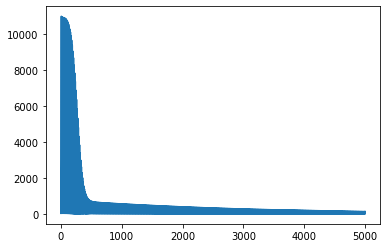

In [ ]:
#@title Training the Model
history = []
for i in range(epochs):        
  for batch_ind in range(X.shape[0]):
    # wrap the data in variables
    x_batch = Variable(torch.Tensor(X[batch_ind]))
    y_batch = Variable(torch.Tensor(y[batch_ind]))                   
    # forward pass
    y_pred = model(x_batch)        
    # compute and print loss
    loss = loss_fn(y_pred, y_batch)  
    history.append(loss.data) 
    print(f"[{i}/{batch_ind}] Loss = {loss.data}")    
    # reset gradients
    optimizer.zero_grad()        
    # backwards pass
    loss.backward()        
    # step the optimizer - update the weights
    optimizer.step()
plt.plot(history)

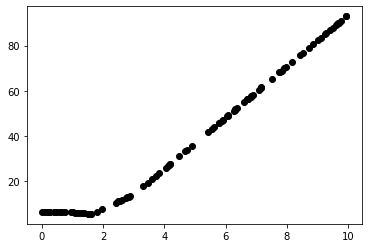

In [ ]:
X_a = torch.rand(100,1).clone() * 10
y_a = model(X_a)
y_a = y_a.detach().numpy()
plt.plot(X_a, y_a, 'o', color='black')